<a href="https://colab.research.google.com/github/imatcha/DataMining2020/blob/master/108971014_DM_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###在 colab mount 一個自己的資料夾空間

In [ ]:
from google.colab import drive
drive.mount('/content/gDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gDrive


In [ ]:
## Import Library ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For Data Encoding ##
from sklearn.preprocessing import LabelEncoder

## For Model Evaluation ##
from sklearn.model_selection import KFold

## Machine Learning Model ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier #my_add
from sklearn.neighbors import KNeighborsClassifier  #my_add
from sklearn.ensemble import AdaBoostClassifier #my_add

## For Model Performance ##
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
## Model Performance
def evaluation(gt, pred):
    acc = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred)
    f1 = f1_score(gt, pred)
    matrix = confusion_matrix(gt, pred)
    
    return acc, precision, recall, f1, matrix

In [ ]:
path = '/content/gDrive/My Drive/DM2020-master/'
raw_data = pd.read_csv(path + "./EmployeeAttrition.csv", index_col=0)
#raw_data = pd.read_csv("./EmployeeAttrition.csv", index_col=0)

In [ ]:
raw_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,3,4,0,17,3,2,9,6,0,8


In [ ]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [ ]:
categorical_col = []
numeric_col = []
for col in raw_data.columns:
    if raw_data[col].dtype == object and col != "Attrition":
        categorical_col.append(col)
        print(col, raw_data[col].unique())
        print("========================================================================")
    elif raw_data[col].dtype == int and col != "Attrition":
        numeric_col.append(col)

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']


In [ ]:
## Encode Label
raw_data["Attrition"] = raw_data["Attrition"].astype("category").cat.codes
raw_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

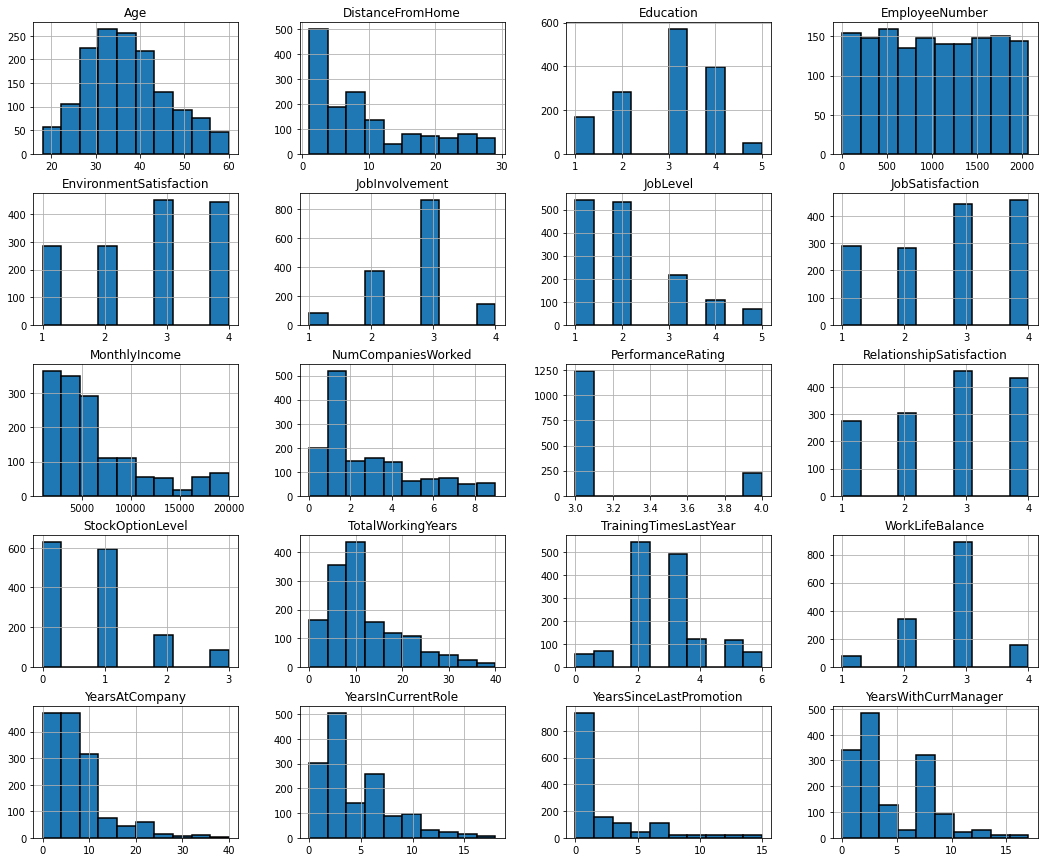

In [ ]:
## Data Visualization for numerical data
raw_data[numeric_col].hist(edgecolor='black', linewidth=1.5, figsize=(18, 15))
plt.show()

In [ ]:
X = np.array(raw_data["TotalWorkingYears"]).reshape(len(raw_data), 1)
y = np.array(raw_data["MonthlyIncome"])
model = LinearRegression()
model = model.fit(X, y)
pred = model.predict(X)
print("y = %f * X + %f" % (model.coef_[0], model.intercept_))

y = 467.658412 * X + 1227.935288


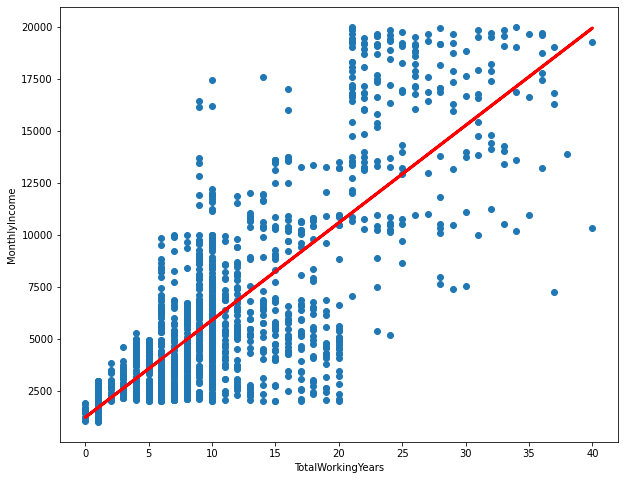

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(raw_data["TotalWorkingYears"], raw_data["MonthlyIncome"])
plt.plot(raw_data["TotalWorkingYears"], pred, color="red", linewidth = 3)
plt.xlabel("TotalWorkingYears")
plt.ylabel("MonthlyIncome")
plt.show()

In [ ]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

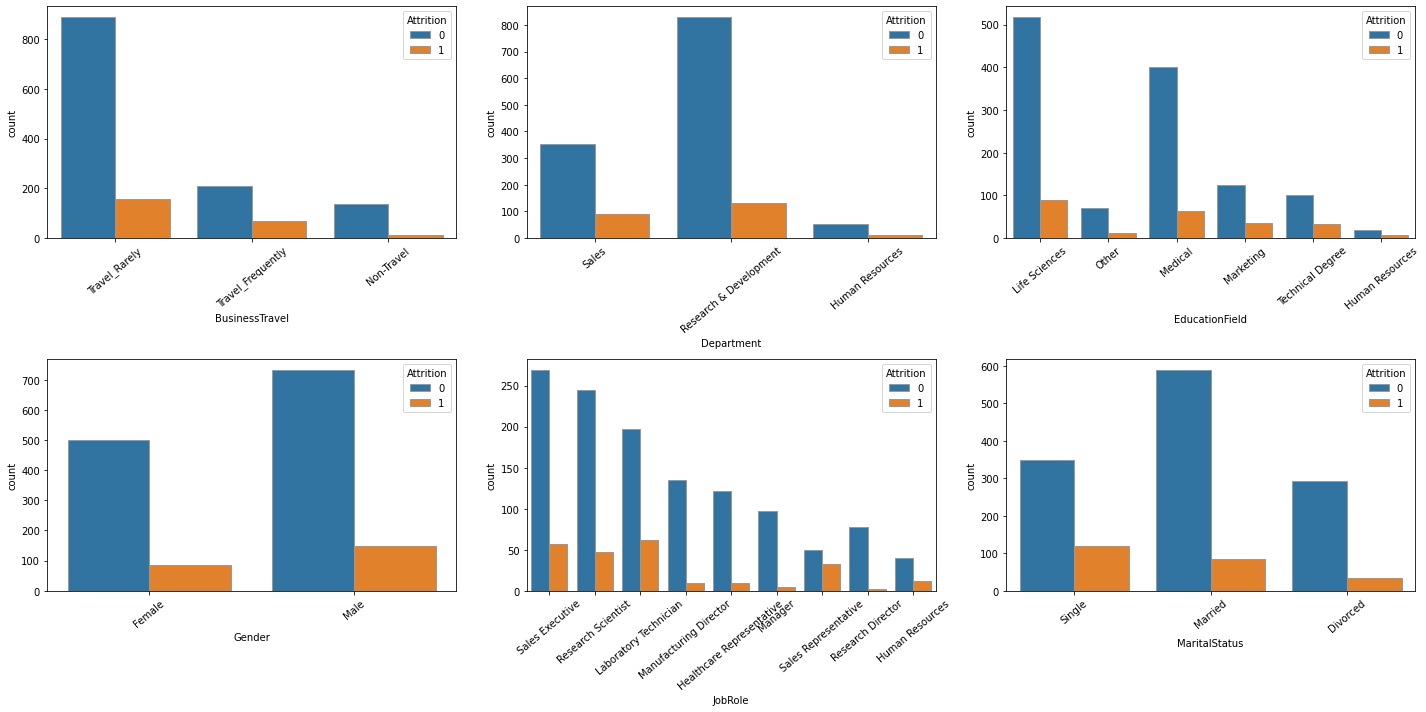

In [ ]:
## Data Visualization for categorical data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(categorical_col):
    row_num = int(index / 3)
    col_num = (index % 3)
    label = list(raw_data[col].unique())
    sns.countplot(x=str(col), hue="Attrition", edgecolor=".6", data=raw_data, ax = axes[row_num, col_num])
    axes[row_num, col_num].set_xticklabels(label, rotation=40)
plt.tight_layout()
plt.show()

In [ ]:
## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data, columns=categorical_col)

In [ ]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [ ]:
set(one_hot_encoding_df.columns) - set(numeric_col)

{'Attrition',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single'}

In [ ]:
## Data Splitting and Model Learning (Decision Tree)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = DecisionTreeClassifier(random_state=200)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.752000, Precision: 0.268000, Recall: 0.319000, F1: 0.291000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.789000, Precision: 0.333000, Recall: 0.442000, F1: 0.380000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.741000, Precision: 0.311000, Recall: 0.237000, F1: 0.269000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.738000, Precision: 0.233000, Recall: 0.311000, F1: 0.267000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.670000, Precision: 0.235000, Recall: 0.558000, F1: 0.331000
Avg Accuracy: 0.738000, Avg Precision: 0.276000, Avg Recall: 0.374000, Avg F1: 0.308000


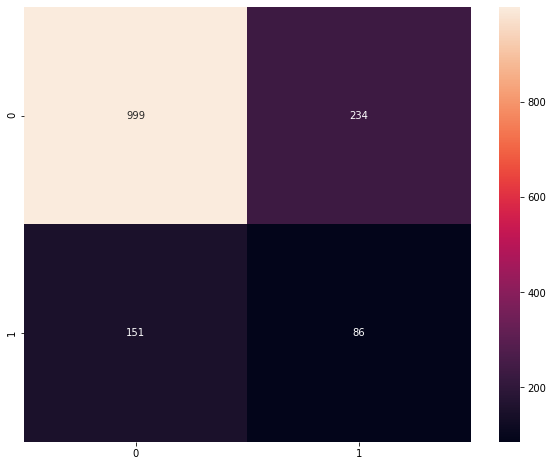

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [ ]:
importance_dict = {}
for col, importance in zip(train_X.columns, np.mean(np.array(avg_feature_importance), axis=0)):
    importance_dict[col] = importance

sorted(importance_dict.items(), key=lambda x: -x[1])[:10]

[('MonthlyIncome', 0.10020746536225093),
 ('TotalWorkingYears', 0.08286263996666518),
 ('Age', 0.07866270282338719),
 ('DistanceFromHome', 0.07651699500507207),
 ('EmployeeNumber', 0.06251880620094238),
 ('NumCompaniesWorked', 0.054148502062084915),
 ('TrainingTimesLastYear', 0.04497546911268388),
 ('JobInvolvement', 0.03828324416180727),
 ('StockOptionLevel', 0.035453500524868876),
 ('JobSatisfaction', 0.03481479445074119)]

In [ ]:
## Data Splitting and Model Learning (Random Forest)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = RandomForestClassifier(n_estimators=300)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.847000, Precision: 0.625000, Recall: 0.106000, F1: 0.182000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.867000, Precision: 0.667000, Recall: 0.186000, F1: 0.291000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.803000, Precision: 0.600000, Recall: 0.051000, F1: 0.094000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.864000, Precision: 0.857000, Recall: 0.133000, F1: 0.231000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.867000, Precision: 0.833000, Recall: 0.116000, F1: 0.204000
Avg Accuracy: 0.850000, Avg Precision: 0.716000, Avg Recall: 0.119000, Avg F1: 0.200000


#my_add for Random Forest

In [ ]:
## Data Splitting and Model Learning (Random Forest)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    #my_add
    model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=10, class_weight="balanced",random_state=300)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.823000, Precision: 0.414000, Recall: 0.255000, F1: 0.316000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.820000, Precision: 0.391000, Recall: 0.419000, F1: 0.404000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.799000, Precision: 0.500000, Recall: 0.441000, F1: 0.468000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.806000, Precision: 0.389000, Recall: 0.467000, F1: 0.424000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.833000, Precision: 0.425000, Recall: 0.395000, F1: 0.410000
Avg Accuracy: 0.816000, Avg Precision: 0.424000, Avg Recall: 0.395000, Avg F1: 0.405000


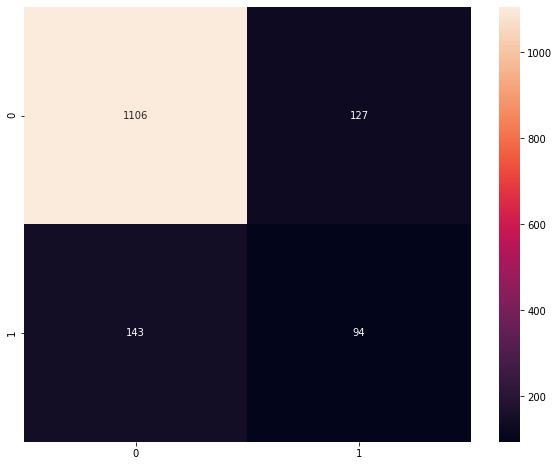

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [ ]:
importance_dict = {}
for col, importance in zip(train_X.columns, np.mean(np.array(avg_feature_importance), axis=0)):
    importance_dict[col] = importance

sorted(importance_dict.items(), key=lambda x: -x[1])[:10]

[('MonthlyIncome', 0.08020324282481127),
 ('Age', 0.07127947662915259),
 ('EmployeeNumber', 0.06349458595142746),
 ('DistanceFromHome', 0.055139080171672884),
 ('TotalWorkingYears', 0.05402840306772755),
 ('YearsAtCompany', 0.04923600264065607),
 ('NumCompaniesWorked', 0.039870193330865625),
 ('YearsWithCurrManager', 0.03609095101952426),
 ('EnvironmentSatisfaction', 0.03422765012072527),
 ('YearsInCurrentRole', 0.03401761560021972)]

In [ ]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.854000, Precision: 0.833000, Recall: 0.106000, F1: 0.189000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.867000, Precision: 0.643000, Recall: 0.209000, F1: 0.316000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.810000, Precision: 0.615000, Recall: 0.136000, F1: 0.222000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.878000, Precision: 0.846000, Recall: 0.244000, F1: 0.379000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.884000, Precision: 0.765000, Recall: 0.302000, F1: 0.433000
Avg Accuracy: 0.859000, Avg Precision: 0.740000, Avg Recall: 0.200000, Avg F1: 0.308000


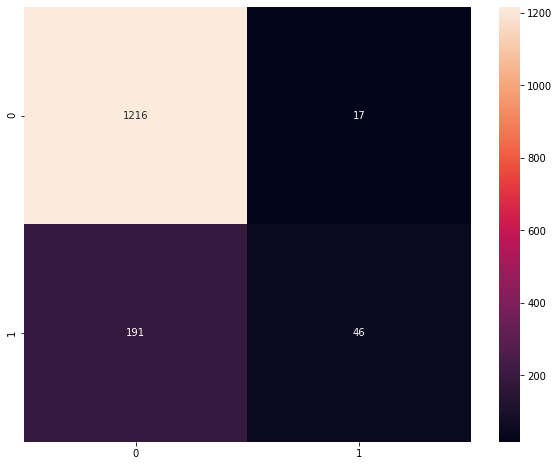

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

#my_add for Gradient Boosting

In [ ]:
## Data Splitting and Model Learning (Gradient Boosting)

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = GradientBoostingClassifier(n_estimators=900,learning_rate=0.1,random_state=100,max_features=4 )
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.867000, Precision: 0.750000, Recall: 0.255000, F1: 0.381000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.867000, Precision: 0.562000, Recall: 0.419000, F1: 0.480000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.813000, Precision: 0.571000, Recall: 0.271000, F1: 0.368000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.864000, Precision: 0.586000, Recall: 0.378000, F1: 0.459000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.888000, Precision: 0.750000, Recall: 0.349000, F1: 0.476000
Avg Accuracy: 0.860000, Avg Precision: 0.644000, Avg Recall: 0.334000, Avg F1: 0.433000


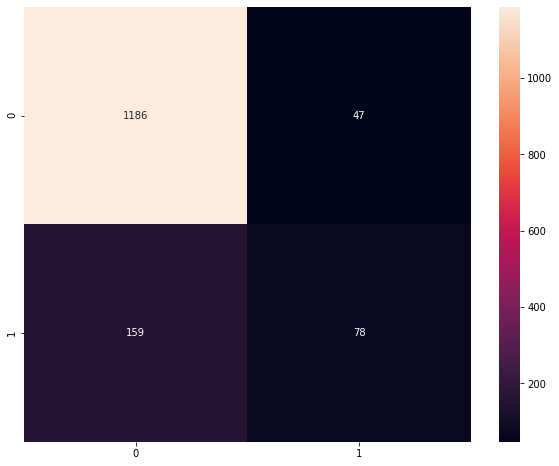

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

#my_add for KNN

In [ ]:
## Data Splitting and Model Learning (K Nearest Neighbor)

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.776000, Precision: 0.298000, Recall: 0.298000, F1: 0.298000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.741000, Precision: 0.211000, Recall: 0.279000, F1: 0.240000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.728000, Precision: 0.111000, Recall: 0.051000, F1: 0.070000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.748000, Precision: 0.163000, Recall: 0.156000, F1: 0.159000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.755000, Precision: 0.236000, Recall: 0.302000, F1: 0.265000
Avg Accuracy: 0.750000, Avg Precision: 0.204000, Avg Recall: 0.217000, Avg F1: 0.206000


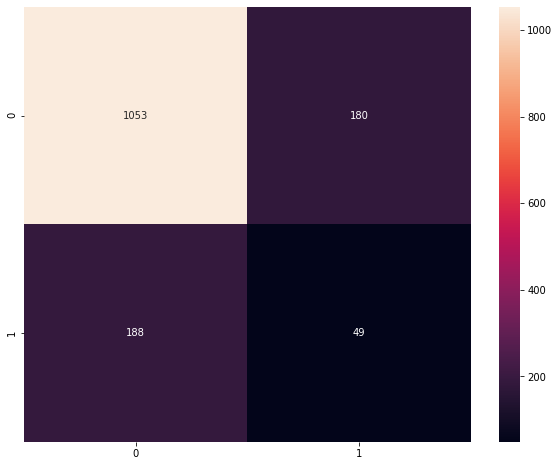

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

#my_add for AdaBoosting

In [ ]:
## Data Splitting and Model Learning (Adaptive Boosting)

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = AdaBoostClassifier(n_estimators=450, learning_rate=0.3)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.857000, Precision: 1.000000, Recall: 0.106000, F1: 0.192000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.871000, Precision: 0.576000, Recall: 0.442000, F1: 0.500000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.830000, Precision: 0.655000, Recall: 0.322000, F1: 0.432000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.878000, Precision: 0.645000, Recall: 0.444000, F1: 0.526000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.878000, Precision: 0.733000, Recall: 0.256000, F1: 0.379000
Avg Accuracy: 0.863000, Avg Precision: 0.722000, Avg Recall: 0.314000, Avg F1: 0.406000


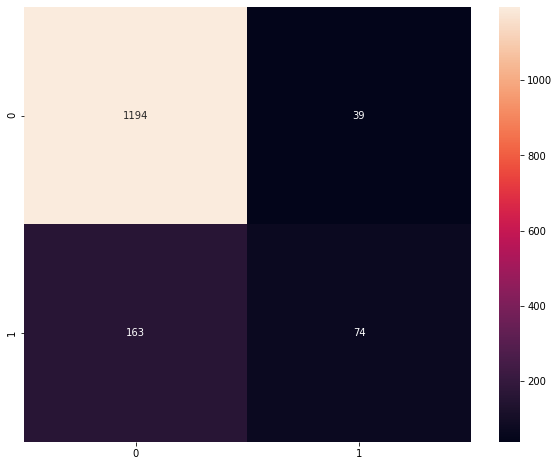

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()